In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-classification-for-basic-nlp/Spam Email raw text for NLP.csv


In [3]:
import pandas as pd

df = pd.read_csv('/kaggle/input/spam-classification-for-basic-nlp/Spam Email raw text for NLP.csv')

print(df.head())

   CATEGORY                                            MESSAGE  \
0         1  Dear Homeowner,\n\n \n\nInterest Rates are at ...   
1         1  ATTENTION: This is a MUST for ALL Computer Use...   
2         1  This is a multi-part message in MIME format.\n...   
3         1  IMPORTANT INFORMATION:\n\n\n\nThe new domain n...   
4         1  This is the bottom line.  If you can GIVE AWAY...   

                                FILE_NAME  
0  00249.5f45607c1bffe89f60ba1ec9f878039a  
1  00373.ebe8670ac56b04125c25100a36ab0510  
2  00214.1367039e50dc6b7adb0f2aa8aba83216  
3  00210.050ffd105bd4e006771ee63cabc59978  
4  00033.9babb58d9298daa2963d4f514193d7d6  


In [4]:
df_msg = df[['CATEGORY','MESSAGE']].copy()

In [5]:
df_msg

,CATEGORY,MESSAGE
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ..."
1,1,ATTENTION: This is a MUST for ALL Computer Use...
2,1,This is a multi-part message in MIME format.\n...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
4,1,This is the bottom line. If you can GIVE AWAY...
...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver..."
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\..."
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w..."


In [6]:
pip install Contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 6.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 7.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import contractions
import pandas as pd
from tqdm.notebook import tqdm

tqdm.pandas()  # enables progress_apply for a progress bar

# Apply contraction expansion to each row
df_msg['expanded_msg'] = df_msg['MESSAGE'].progress_apply(lambda x: contractions.fix(str(x)))
df['expanded_msg'] = df['MESSAGE'].progress_apply(lambda x: contractions.fix(str(x)))

  0%|          | 0/5796 [00:00<?, ?it/s]

  0%|          | 0/5796 [00:00<?, ?it/s]

In [8]:
df_msg

,CATEGORY,MESSAGE,expanded_msg
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...","Dear Homeowner,\n\n \n\nInterest Rates are at ..."
1,1,ATTENTION: This is a MUST for ALL Computer Use...,ATTENTION: This is a MUST for ALL Computer Use...
2,1,This is a multi-part message in MIME format.\n...,This is a multi-part message in MIME format.\n...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
4,1,This is the bottom line. If you can GIVE AWAY...,This is the bottom line. If you can GIVE AWAY...
...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...","I am one of the 30,000 but it is not working v..."
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,Damien Morton quoted:\n\n>W3C approves HTML 4 ...
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...","On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\..."
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...","Once upon a time, Manfred wrote :\n\n\n\n> I w..."


In [9]:
import re
import string
from nltk.corpus import stopwords
from textblob import TextBlob
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
import re
import string
import pandas as pd
from tqdm import tqdm
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer

tqdm.pandas()

def clean_text(text, spell_correct=False, remove_stopwords=True):
    if not isinstance(text, str):
        return ""
    
    # 1. Lowercase
    text = text.lower()
    
    # 2. Remove URLs
    text = re.sub(r'http\S+|www\.\S+|https\S+', '', text)
    
    # 3. Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # 4. Remove datetime
    text = re.sub(
        r'on\s+\w+,\s+\d{4}-\d{2}-\d{2}\s+at\s+\d{1,2}:\d{2}',
        '',
        text,
        flags=re.IGNORECASE
    )
    
    # 5. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # 6. Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)
    
    # 7. Remove hashtags (#hashtag)
    text = re.sub(r'#\w+', '', text)
    
    # 8. Remove repeated characters (heeeello -> helo)
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    
    # 9. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 10. Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # 11. Remove extra whitespace
    text = ' '.join(text.split())
    
    # 12. Tokenize
    tokens = text.split()
    
    # 13. Remove stopwords (optional)
    if remove_stopwords:
        stop_words = set(stopwords.words("english"))
        tokens = [w for w in tokens if w not in stop_words]
    """
    # 14. Spell correction (optional and SLOW)
    if spell_correct:
        tokens = [str(TextBlob(w).correct()) for w in tokens]"""
    
    # Return cleaned tokens as string
    return ' '.join(tokens)


# Step 1: Clean the text
print("=== Step 1: Cleaning Text ===")
df_msg['cleaned_text'] = df_msg['expanded_msg'].progress_apply(
    lambda x: clean_text(x, spell_correct=False, remove_stopwords=True)
)
print(f"Cleaning completed. Sample:\n{df_msg['cleaned_text'].head(3)}")

=== Step 1: Cleaning Text ===


100%|██████████| 5796/5796 [00:02<00:00, 2178.44it/s]

Cleaning completed. Sample:
0    dear homeowner interest rates lowest point yea...
1    attention must computer users newspecial packa...
2    multipart message mime format nextpartcdccbfa ...
Name: cleaned_text, dtype: object


In [11]:
df_msg

,CATEGORY,MESSAGE,expanded_msg,cleaned_text
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...","Dear Homeowner,\n\n \n\nInterest Rates are at ...",dear homeowner interest rates lowest point yea...
1,1,ATTENTION: This is a MUST for ALL Computer Use...,ATTENTION: This is a MUST for ALL Computer Use...,attention must computer users newspecial packa...
2,1,This is a multi-part message in MIME format.\n...,This is a multi-part message in MIME format.\n...,multipart message mime format nextpartcdccbfa ...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,important information new domain names finally...
4,1,This is the bottom line. If you can GIVE AWAY...,This is the bottom line. If you can GIVE AWAY...,bottom line give away cds free people like one...
...,...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...","I am one of the 30,000 but it is not working v...",one working well week tes updates servers sync...
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,damien morton quoted wc approves html emotitag...
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...","On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",che wrote correct lines added sourceslist repo...
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...","Once upon a time, Manfred wrote :\n\n\n\n> I w...",upon time manfred wrote would like install rpm...


In [12]:
# Using NLTK
import nltk
nltk.download('punkt')

def tokenize_text(text):
    # Word tokenization
    word_tokens = nltk.word_tokenize(text)
    # Sentence tokenization
    sentence_tokens = nltk.sent_tokenize(text)
    return word_tokens, sentence_tokens

#df_msg['word_tokens'] = tokenize_text(df_msg['cleaned_text'])
df_msg[['word_tokens', 'sentence_tokens']] = df_msg['cleaned_text'].progress_apply(
    lambda x: pd.Series(tokenize_text(x))
)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 5796/5796 [00:03<00:00, 1640.73it/s]


In [13]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 50.7 MB/s eta 0:00:0000:0100:01


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

vectorizer = TfidfVectorizer(
    analyzer='char_wb',
    ngram_range=(3,5),
    min_df=2,
    max_features=30000
)

X = vectorizer.fit_transform(df_msg['cleaned_text'])
y = df_msg['CATEGORY']

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=None
)

In [16]:
df

,CATEGORY,MESSAGE,FILE_NAME,expanded_msg
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a,"Dear Homeowner,\n\n \n\nInterest Rates are at ..."
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510,ATTENTION: This is a MUST for ALL Computer Use...
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216,This is a multi-part message in MIME format.\n...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6,This is the bottom line. If you can GIVE AWAY...
...,...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97,"I am one of the 30,000 but it is not working v..."
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,00957.e0b56b117f3ec5f85e432a9d2a47801f,Damien Morton quoted:\n\n>W3C approves HTML 4 ...
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",01127.841233b48eceb74a825417d8d918abf8,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\..."
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",01178.5c977dff972cd6eef64d4173b90307f0,"Once upon a time, Manfred wrote :\n\n\n\n> I w..."


In [17]:
df_msg

,CATEGORY,MESSAGE,expanded_msg,cleaned_text,word_tokens,sentence_tokens
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...","Dear Homeowner,\n\n \n\nInterest Rates are at ...",dear homeowner interest rates lowest point yea...,"[dear, homeowner, interest, rates, lowest, poi...",[dear homeowner interest rates lowest point ye...
1,1,ATTENTION: This is a MUST for ALL Computer Use...,ATTENTION: This is a MUST for ALL Computer Use...,attention must computer users newspecial packa...,"[attention, must, computer, users, newspecial,...",[attention must computer users newspecial pack...
2,1,This is a multi-part message in MIME format.\n...,This is a multi-part message in MIME format.\n...,multipart message mime format nextpartcdccbfa ...,"[multipart, message, mime, format, nextpartcdc...",[multipart message mime format nextpartcdccbfa...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,important information new domain names finally...,"[important, information, new, domain, names, f...",[important information new domain names finall...
4,1,This is the bottom line. If you can GIVE AWAY...,This is the bottom line. If you can GIVE AWAY...,bottom line give away cds free people like one...,"[bottom, line, give, away, cds, free, people, ...",[bottom line give away cds free people like on...
...,...,...,...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...","I am one of the 30,000 but it is not working v...",one working well week tes updates servers sync...,"[one, working, well, week, tes, updates, serve...",[one working well week tes updates servers syn...
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,damien morton quoted wc approves html emotitag...,"[damien, morton, quoted, wc, approves, html, e...",[damien morton quoted wc approves html emotita...
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...","On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",che wrote correct lines added sourceslist repo...,"[che, wrote, correct, lines, added, sourceslis...",[che wrote correct lines added sourceslist rep...
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...","Once upon a time, Manfred wrote :\n\n\n\n> I w...",upon time manfred wrote would like install rpm...,"[upon, time, manfred, wrote, would, like, inst...",[upon time manfred wrote would like install rp...


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Prepare data
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')
X = vectorizer.fit_transform(df_msg['cleaned_text'])
y = df['CATEGORY']

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 4. Evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

"""# 5. Test new messages
new_messages = ["Free prize call now", "Hey, want to meet for coffee?"]
predictions = model.predict(vectorizer.transform(new_messages))

for msg, pred in zip(new_messages, predictions):
    print(f"{msg} → {'Spam' if pred == 1 else 'Ham'}")"""

Accuracy: 0.9810
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.99       781
        Spam       1.00      0.94      0.97       379

    accuracy                           0.98      1160
   macro avg       0.99      0.97      0.98      1160
weighted avg       0.98      0.98      0.98      1160



'# 5. Test new messages\nnew_messages = ["Free prize call now", "Hey, want to meet for coffee?"]\npredictions = model.predict(vectorizer.transform(new_messages))\n\nfor msg, pred in zip(new_messages, predictions):\n    print(f"{msg} → {\'Spam\' if pred == 1 else \'Ham\'}")'

In [19]:
import re
import string
import pandas as pd
from tqdm import tqdm
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer

tqdm.pandas()

def apply_stemming_lemmatization(text):
    if not isinstance(text, str) or not text.strip():
        return {
            "lemma": "",
            "porter": "",
            "lancaster": "",
            "snowball": ""
        }
    
    # Tokenize
    tokens = text.split()
    
    # Initialize stemmers and lemmatizer
    porter = PorterStemmer()
    lancaster = LancasterStemmer()
    snowball = SnowballStemmer("english")
    lemmatizer = WordNetLemmatizer()
    
    # Apply each technique
    lemma_out = [lemmatizer.lemmatize(w) for w in tokens]
    porter_out = [porter.stem(w) for w in tokens]
    lancaster_out = [lancaster.stem(w) for w in tokens]
    snowball_out = [snowball.stem(w) for w in tokens]
    
    # Return all outputs
    return {
        "lemma": " ".join(lemma_out),
        "porter": " ".join(porter_out),
        "lancaster": " ".join(lancaster_out),
        "snowball": " ".join(snowball_out)
    }


# Step 2: Apply stemming and lemmatization
print("\n=== Step 2: Applying Stemming/Lemmatization ===")
df_stemmed = df_msg['cleaned_text'].progress_apply(
    apply_stemming_lemmatization
).apply(pd.Series)


=== Step 2: Applying Stemming/Lemmatization ===


100%|██████████| 5796/5796 [00:28<00:00, 200.42it/s]


In [20]:
df_stemmed

,lemma,porter,lancaster,snowball
0,dear homeowner interest rate lowest point year...,dear homeown interest rate lowest point year h...,dear homeown interest rat lowest point year he...,dear homeown interest rate lowest point year h...
1,attention must computer user newspecial packag...,attent must comput user newspeci packag deal n...,at must comput us newspec pack deal norton sys...,attent must comput user newspeci packag deal n...
2,multipart message mime format nextpartcdccbfa ...,multipart messag mime format nextpartcdccbfa c...,multipart mess mim form nextpartcdccbf content...,multipart messag mime format nextpartcdccbfa c...
3,important information new domain name finally ...,import inform new domain name final avail gene...,import inform new domain nam fin avail gen pub...,import inform new domain name final avail gene...
4,bottom line give away cd free people like one ...,bottom line give away cd free peopl like one m...,bottom lin giv away cds fre peopl lik on mon l...,bottom line give away cds free peopl like one ...
...,...,...,...,...
5791,one working well week te update server syncing...,one work well week te updat server sync origin...,on work wel week tes upd serv synt origin mess...,one work well week tes updat server sync origi...
5792,damien morton quoted wc approves html emotitag...,damien morton quot wc approv html emotitag abl...,damy morton quot wc approv html emotit abl say...,damien morton quot wc approv html emotitag abl...
5793,che wrote correct line added sourceslist repos...,che wrote correct line ad sourceslist reposito...,che wrot correct lin ad sourcesl reposit aptge...,che wrote correct line ad sourceslist reposito...
5794,upon time manfred wrote would like install rpm...,upon time manfr wrote would like instal rpm tr...,upon tim manfr wrot would lik instal rpm tri g...,upon time manfr wrote would like instal rpm tr...


In [21]:
# Combine with original dataframe
df_msg_final = pd.concat([df_msg, df_stemmed], axis=1)

#print("\n=== Results ===")
#print(df_msg_final[['expanded_text', 'cleaned_text', 'lemma', 'porter']].head())

In [22]:
df_msg_final

,CATEGORY,MESSAGE,expanded_msg,cleaned_text,word_tokens,sentence_tokens,lemma,porter,lancaster,snowball
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...","Dear Homeowner,\n\n \n\nInterest Rates are at ...",dear homeowner interest rates lowest point yea...,"[dear, homeowner, interest, rates, lowest, poi...",[dear homeowner interest rates lowest point ye...,dear homeowner interest rate lowest point year...,dear homeown interest rate lowest point year h...,dear homeown interest rat lowest point year he...,dear homeown interest rate lowest point year h...
1,1,ATTENTION: This is a MUST for ALL Computer Use...,ATTENTION: This is a MUST for ALL Computer Use...,attention must computer users newspecial packa...,"[attention, must, computer, users, newspecial,...",[attention must computer users newspecial pack...,attention must computer user newspecial packag...,attent must comput user newspeci packag deal n...,at must comput us newspec pack deal norton sys...,attent must comput user newspeci packag deal n...
2,1,This is a multi-part message in MIME format.\n...,This is a multi-part message in MIME format.\n...,multipart message mime format nextpartcdccbfa ...,"[multipart, message, mime, format, nextpartcdc...",[multipart message mime format nextpartcdccbfa...,multipart message mime format nextpartcdccbfa ...,multipart messag mime format nextpartcdccbfa c...,multipart mess mim form nextpartcdccbf content...,multipart messag mime format nextpartcdccbfa c...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,important information new domain names finally...,"[important, information, new, domain, names, f...",[important information new domain names finall...,important information new domain name finally ...,import inform new domain name final avail gene...,import inform new domain nam fin avail gen pub...,import inform new domain name final avail gene...
4,1,This is the bottom line. If you can GIVE AWAY...,This is the bottom line. If you can GIVE AWAY...,bottom line give away cds free people like one...,"[bottom, line, give, away, cds, free, people, ...",[bottom line give away cds free people like on...,bottom line give away cd free people like one ...,bottom line give away cd free peopl like one m...,bottom lin giv away cds fre peopl lik on mon l...,bottom line give away cds free peopl like one ...
...,...,...,...,...,...,...,...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...","I am one of the 30,000 but it is not working v...",one working well week tes updates servers sync...,"[one, working, well, week, tes, updates, serve...",[one working well week tes updates servers syn...,one working well week te update server syncing...,one work well week te updat server sync origin...,on work wel week tes upd serv synt origin mess...,one work well week tes updat server sync origi...
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,damien morton quoted wc approves html emotitag...,"[damien, morton, quoted, wc, approves, html, e...",[damien morton quoted wc approves html emotita...,damien morton quoted wc approves html emotitag...,damien morton quot wc approv html emotitag abl...,damy morton quot wc approv html emotit abl say...,damien morton quot wc approv html emotitag abl...
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...","On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",che wrote correct lines added sourceslist repo...,"[che, wrote, correct, lines, added, sourceslis...",[che wrote correct lines added sourceslist rep...,che wrote correct line added sourceslist repos...,che wrote correct line ad sourceslist reposito...,che wrot correct lin ad sourcesl reposit aptge...,che wrote correct line ad sourceslist reposito...
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...","Once upon a time, Manfred wrote :\n\n\n\n> I w...",upon time manfred wrote would like install rpm...,"[upon, time, manfred, w

In [23]:
df

,CATEGORY,MESSAGE,FILE_NAME,expanded_msg
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a,"Dear Homeowner,\n\n \n\nInterest Rates are at ..."
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510,ATTENTION: This is a MUST for ALL Computer Use...
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216,This is a multi-part message in MIME format.\n...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6,This is the bottom line. If you can GIVE AWAY...
...,...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97,"I am one of the 30,000 but it is not working v..."
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,00957.e0b56b117f3ec5f85e432a9d2a47801f,Damien Morton quoted:\n\n>W3C approves HTML 4 ...
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",01127.841233b48eceb74a825417d8d918abf8,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\..."
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",01178.5c977dff972cd6eef64d4173b90307f0,"Once upon a time, Manfred wrote :\n\n\n\n> I w..."


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    analyzer='char',
    ngram_range=(3,5),
    min_df=2,
    max_features=30000
)

In [25]:
"""
import spacy
nlp = spacy.load("en_core_web_sm")

df_msg['lemmatized_msg'] = df_msg['cleaned_msg'].apply(
    lambda x: " ".join([t.lemma_ for t in nlp(x)])
)"""

'\nimport spacy\nnlp = spacy.load("en_core_web_sm")\n\ndf_msg[\'lemmatized_msg\'] = df_msg[\'cleaned_msg\'].apply(\n    lambda x: " ".join([t.lemma_ for t in nlp(x)])\n)'

In [26]:
"""
import spacy

nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if token.is_alpha])

df_msg['lemmatized_message'] = df_msg['cleaned_msg'].apply(lemmatize_text)"""

'\nimport spacy\n\nnlp = spacy.load("en_core_web_sm")\n\ndef lemmatize_text(text):\n    doc = nlp(text)\n    return " ".join([token.lemma_ for token in doc if token.is_alpha])\n\ndf_msg[\'lemmatized_message\'] = df_msg[\'cleaned_msg\'].apply(lemmatize_text)'

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

cv_lemma = CountVectorizer(max_features=3000)
X_bow_lemma = cv_lemma.fit_transform(
    df_stemmed['lemma']
).toarray()

y_bow = df_msg['CATEGORY'].values

print("BoW (lemmatized) shape:", X_bow_lemma.shape)

BoW (lemmatized) shape: (5796, 3000)


In [28]:
from nltk.stem import PorterStemmer
import nltk

nltk.download('punkt')
stemmer = PorterStemmer()

def stem_text(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df_msg['stemmed_msg'] = df_msg['cleaned_text'].apply(stem_text)

cv_stem = CountVectorizer(max_features=3000)
X_bow_stem = cv_stem.fit_transform(
    df_msg['stemmed_msg']
).toarray()

print("BoW (stemmed) shape:", X_bow_stem.shape)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


BoW (stemmed) shape: (5796, 3000)


In [29]:
#stemming
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
import pandas as pd

def stem_words(text):
    if isinstance(text, str):
        tokens = text.split()
    else:
        tokens = text

    porter = PorterStemmer()
    snowball = SnowballStemmer('english')
    lancaster = LancasterStemmer()

    porter_stem = [porter.stem(token) for token in tokens]
    snowball_stem = [snowball.stem(token) for token in tokens]
    lancaster_stem = [lancaster.stem(token) for token in tokens]

    return porter_stem, snowball_stem, lancaster_stem

stemming_results = df_msg['cleaned_text'].apply(stem_words)

df_msg[['porter_stem', 'snowball_stem', 'lancaster_stem']] = pd.DataFrame(
    stemming_results.tolist(), index=df.index
)

print(df_msg[['porter_stem', 'snowball_stem', 'lancaster_stem']].head())

                                         porter_stem  \
0  [dear, homeown, interest, rate, lowest, point,...   
1  [attent, must, comput, user, newspeci, packag,...   
2  [multipart, messag, mime, format, nextpartcdcc...   
3  [import, inform, new, domain, name, final, ava...   
4  [bottom, line, give, away, cd, free, peopl, li...   

                                       snowball_stem  \
0  [dear, homeown, interest, rate, lowest, point,...   
1  [attent, must, comput, user, newspeci, packag,...   
2  [multipart, messag, mime, format, nextpartcdcc...   
3  [import, inform, new, domain, name, final, ava...   
4  [bottom, line, give, away, cds, free, peopl, l...   

                                      lancaster_stem  
0  [dear, homeown, interest, rat, lowest, point, ...  
1  [at, must, comput, us, newspec, pack, deal, no...  
2  [multipart, mess, mim, form, nextpartcdccbf, c...  
3  [import, inform, new, domain, nam, fin, avail,...  
4  [bottom, lin, giv, away, cds, fre, peopl, lik,..

In [30]:
from collections import Counter
import nltk

def create_vocabulary(texts, min_freq=2, max_vocab_size=10000):
    all_tokens = []
    for text in texts:
        tokens = nltk.word_tokenize(text.lower())
        all_tokens.extend(tokens)

    token_counts = Counter(all_tokens)
    # Fix the typo here
    vocab = {token: count for token, count in token_counts.most_common(max_vocab_size) if count >= min_freq}
    
    token2id = {token: idx for idx, (token, _) in enumerate(vocab.items())}
    id2token = {idx: token for token, idx in token2id.items()}

    return vocab, token2id, id2token

vocab, token2id, id2token = create_vocabulary(df_msg['cleaned_text'], min_freq=2)

In [31]:
import pandas as pd

# Build DataFrame from vocab
df_vocab = pd.DataFrame({
    'token': list(vocab.keys()),
    'count': list(vocab.values()),
    'id': [token2id[token] for token in vocab.keys()]
})

df_vocab = df_vocab.sort_values('id').reset_index(drop=True)
df_vocab

,token,count,id
0,email,5141,0
1,list,4219,1
2,one,3728,2
3,font,3556,3
4,get,3496,4
...,...,...,...
9995,widening,9,9995
9996,conservation,9,9996
9997,ida,9,9997
9998,communist,9,9998


In [32]:
df_msg #df_msg['cleaned_msg']

,CATEGORY,MESSAGE,expanded_msg,cleaned_text,word_tokens,sentence_tokens,stemmed_msg,porter_stem,snowball_stem,lancaster_stem
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...","Dear Homeowner,\n\n \n\nInterest Rates are at ...",dear homeowner interest rates lowest point yea...,"[dear, homeowner, interest, rates, lowest, poi...",[dear homeowner interest rates lowest point ye...,dear homeown interest rate lowest point year h...,"[dear, homeown, interest, rate, lowest, point,...","[dear, homeown, interest, rate, lowest, point,...","[dear, homeown, interest, rat, lowest, point, ..."
1,1,ATTENTION: This is a MUST for ALL Computer Use...,ATTENTION: This is a MUST for ALL Computer Use...,attention must computer users newspecial packa...,"[attention, must, computer, users, newspecial,...",[attention must computer users newspecial pack...,attent must comput user newspeci packag deal n...,"[attent, must, comput, user, newspeci, packag,...","[attent, must, comput, user, newspeci, packag,...","[at, must, comput, us, newspec, pack, deal, no..."
2,1,This is a multi-part message in MIME format.\n...,This is a multi-part message in MIME format.\n...,multipart message mime format nextpartcdccbfa ...,"[multipart, message, mime, format, nextpartcdc...",[multipart message mime format nextpartcdccbfa...,multipart messag mime format nextpartcdccbfa c...,"[multipart, messag, mime, format, nextpartcdcc...","[multipart, messag, mime, format, nextpartcdcc...","[multipart, mess, mim, form, nextpartcdccbf, c..."
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,important information new domain names finally...,"[important, information, new, domain, names, f...",[important information new domain names finall...,import inform new domain name final avail gene...,"[import, inform, new, domain, name, final, ava...","[import, inform, new, domain, name, final, ava...","[import, inform, new, domain, nam, fin, avail,..."
4,1,This is the bottom line. If you can GIVE AWAY...,This is the bottom line. If you can GIVE AWAY...,bottom line give away cds free people like one...,"[bottom, line, give, away, cds, free, people, ...",[bottom line give away cds free people like on...,bottom line give away cd free peopl like one m...,"[bottom, line, give, away, cd, free, peopl, li...","[bottom, line, give, away, cds, free, peopl, l...","[bottom, lin, giv, away, cds, fre, peopl, lik,..."
...,...,...,...,...,...,...,...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...","I am one of the 30,000 but it is not working v...",one working well week tes updates servers sync...,"[one, working, well, week, tes, updates, serve...",[one working well week tes updates servers syn...,one work well week te updat server sync origin...,"[one, work, well, week, te, updat, server, syn...","[one, work, well, week, tes, updat, server, sy...","[on, work, wel, week, tes, upd, serv, synt, or..."
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,damien morton quoted wc approves html emotitag...,"[damien, morton, quoted, wc, approves, html, e...",[damien morton quoted wc approves html emotita...,damien morton quot wc approv html emotitag abl...,"[damien, morton, quot, wc, approv, html, emoti...","[damien, morton, quot, wc, approv, html, emoti...","[damy, morton, quot, wc, approv, html, emotit,..."
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...","On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",che wrote correct lines added sourceslist repo...,"[che, wrote, correct, lines, added, sourceslis...",[che wrote correct lines added sourceslist rep...,che wrote correct line ad sourceslist reposito...,"[che, wrote, correct, line, ad, sourceslist, r...","[che, wrote, correct, line, ad, sourceslist, r...","[che, wrot, correct, lin, ad, sourcesl, reposi..."
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...","Once upon a time, Manfred wrote :\n\n\n\n> I w...",upon 

In [33]:
import pandas as pd

spam_texts = df_msg.loc[df_msg['CATEGORY'] == 1, 'cleaned_text']

spam_vocab, spam_token2id, spam_id2token = create_vocabulary(
    spam_texts,
    min_freq=2,
    max_vocab_size=10000
)

df_vocab_spam = pd.DataFrame(
    list(spam_vocab.items()),  # (token, count) pairs
    columns=['token', 'frequency']
)

df_vocab_spam['token_id'] = df_vocab_spam['token'].map(spam_token2id)
df_vocab_spam = df_vocab_spam[['token_id', 'token', 'frequency']]  # reorder columns

In [34]:
df_vocab_spam

,token_id,token,frequency
0,0,email,3745
1,1,font,3539
2,2,widthd,2644
3,3,free,2466
4,4,sized,2314
...,...,...,...
9995,9995,allmerica,4
9996,9996,steeves,4
9997,9997,moshood,4
9998,9998,pointofsale,4


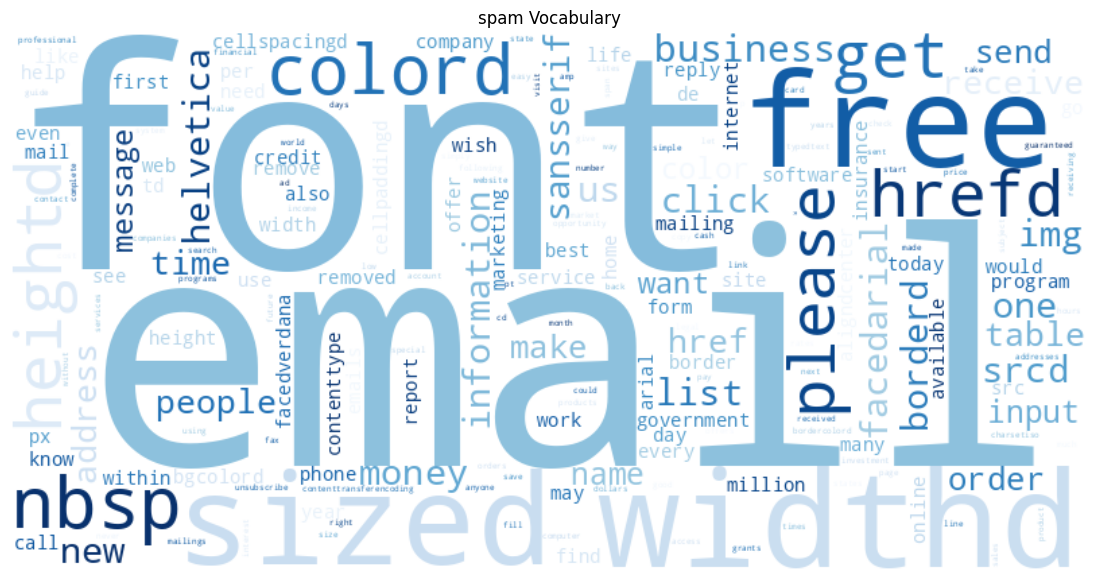

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_dict = dict(zip(df_vocab_spam['token'], df_vocab_spam['frequency']))

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Blues'
).generate_from_frequencies(spam_dict)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('spam Vocabulary')
plt.show()

In [38]:
import pandas as pd

ham_texts = df_msg.loc[df_msg['CATEGORY'] == 0, 'cleaned_text']

ham_vocab, ham_token2id, ham_id2token = create_vocabulary(
    ham_texts,
    min_freq=2,
    max_vocab_size=10000
)

df_vocab_ham = pd.DataFrame(
    list(ham_vocab.items()),  # (token, count) pairs
    columns=['token', 'frequency']
)

df_vocab_ham['token_id'] = df_vocab_ham['token'].map(ham_token2id)
df_vocab_ham = df_vocab_ham[['token_id', 'token', 'frequency']]  # reorder columns

In [39]:
df_vocab_ham

,token_id,token,frequency
0,0,list,2683
1,1,would,2648
2,2,one,2221
3,3,get,1805
4,4,like,1729
...,...,...,...
9995,9995,encoder,5
9996,9996,fundamentalist,5
9997,9997,gloves,5
9998,9998,galaxy,5


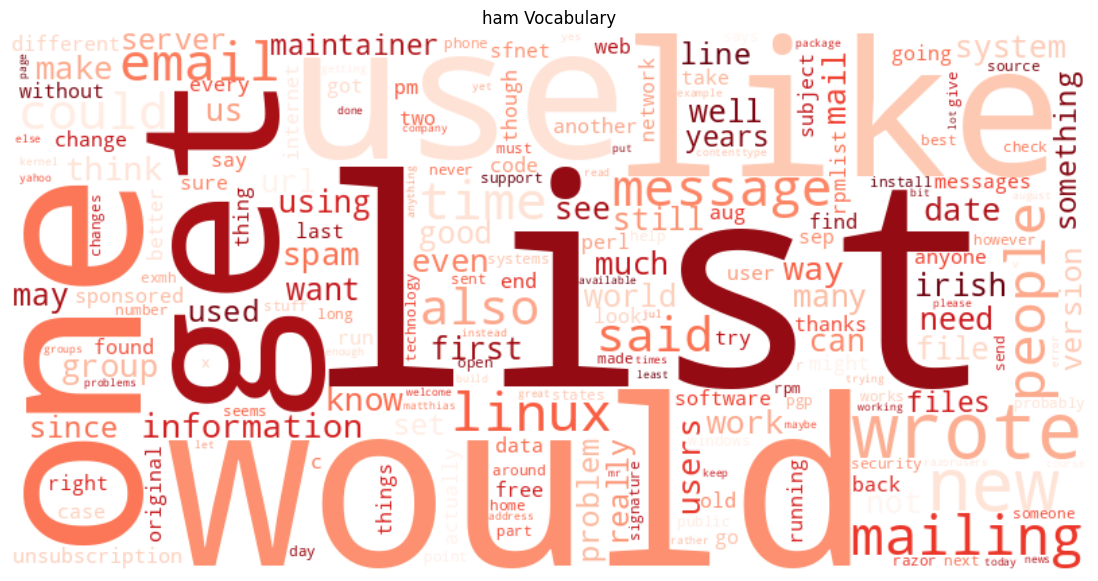

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

ham_dict = dict(zip(df_vocab_ham['token'], df_vocab_ham['frequency']))

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Reds'
).generate_from_frequencies(ham_dict)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('ham Vocabulary')
plt.show()

In [41]:
X = vectorizer.fit_transform(df_msg['cleaned_text'])
y = df_msg['CATEGORY']   # spam / ham

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [42]:
tfidf_df = pd.DataFrame(
    X.toarray(),
    columns=vectorizer.get_feature_names_out()
)

In [43]:
import numpy as np
import nltk

def text_to_bow(text, token2id):
    vec = np.zeros(len(token2id), dtype=int)
    tokens = nltk.word_tokenize(text.lower())
    
    for token in tokens:
        if token in token2id:
            vec[token2id[token]] += 1
    return vec

X = np.array([
    text_to_bow(text, token2id)
    for text in df_msg['cleaned_text']
])

y = df['CATEGORY'].values   # spam / ham

In [44]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Dictionary of models
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {}

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    
    print(f"\n{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")

# Compare results
results_df = pd.DataFrame(results).T
print("\n=== Model Comparison ===")
print(results_df.sort_values('Accuracy', ascending=False))


Naive Bayes:
  Accuracy: 0.9853
  Precision: 0.9918
  Recall: 0.9631
  F1-Score: 0.9772

Logistic Regression:
  Accuracy: 0.9810
  Precision: 0.9972
  Recall: 0.9446
  F1-Score: 0.9702

SVM:
  Accuracy: 0.9845
  Precision: 0.9945
  Recall: 0.9578
  F1-Score: 0.9758

Random Forest:
  Accuracy: 0.9819
  Precision: 0.9661
  Recall: 0.9789
  F1-Score: 0.9725

Decision Tree:
  Accuracy: 0.9483
  Precision: 0.8997
  Recall: 0.9472
  F1-Score: 0.9229

KNN:
  Accuracy: 0.4819
  Precision: 0.3867
  Recall: 1.0000
  F1-Score: 0.5578

Gradient Boosting:
  Accuracy: 0.9707
  Precision: 0.9726
  Recall: 0.9367
  F1-Score: 0.9543

=== Model Comparison ===
                     Accuracy  Precision    Recall  F1-Score
Naive Bayes          0.985345   0.991848  0.963061  0.977242
SVM                  0.984483   0.994521  0.957784  0.975806
Random Forest        0.981897   0.966146  0.978892  0.972477
Logistic Regression  0.981034   0.997214  0.944591  0.970190
Gradient Boosting    0.970690   0.972603  0.

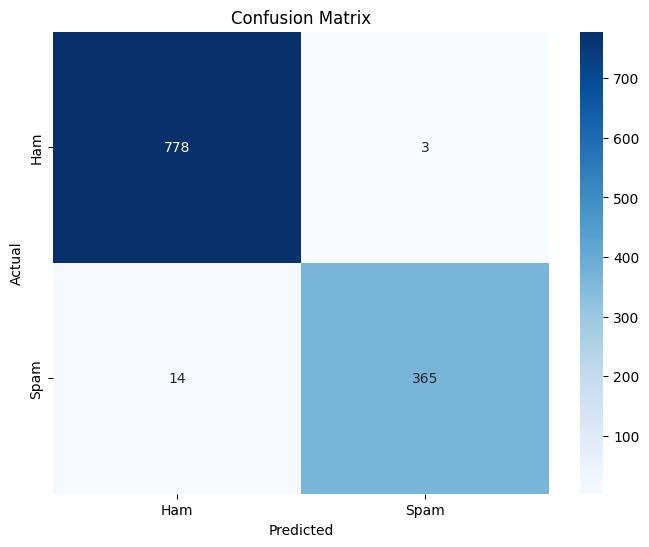


=== Classification Report ===
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       781
        Spam       0.99      0.96      0.98       379

    accuracy                           0.99      1160
   macro avg       0.99      0.98      0.98      1160
weighted avg       0.99      0.99      0.99      1160



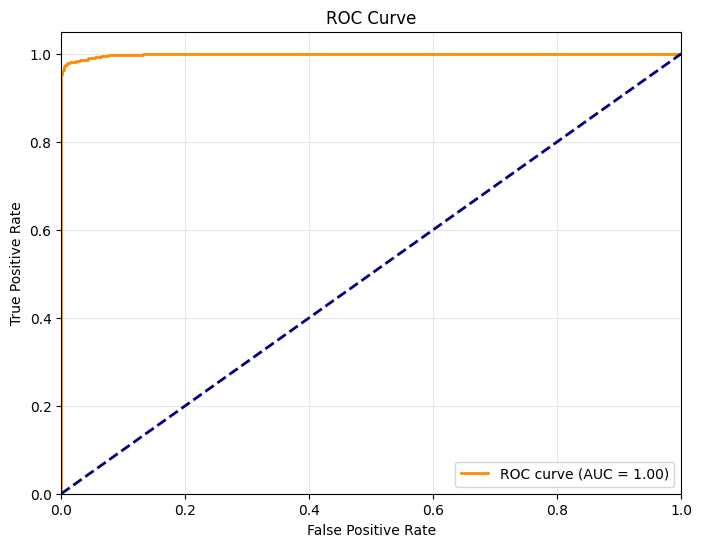

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Choose best model (e.g., Naive Bayes typically works well for text)
best_model = MultinomialNB()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Ham', 'Spam'], 
            yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

# ROC Curve
from sklearn.metrics import roc_curve, auc

y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [47]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9887931034482759
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       762
           1       0.98      0.98      0.98       398

    accuracy                           0.99      1160
   macro avg       0.99      0.99      0.99      1160
weighted avg       0.99      0.99      0.99      1160



In [48]:
from nltk.stem import PorterStemmer
import nltk

nltk.download('punkt')
stemmer = PorterStemmer()

def stem_text(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df_msg['stemmed_message'] = df_msg['cleaned_text'].apply(stem_text)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [49]:
cv_stem = CountVectorizer(max_features=3000)
X_bow_stem = cv_stem.fit_transform(
    df_msg['stemmed_message']
).toarray()

print("BoW (stemmed) shape:", X_bow_stem.shape)

BoW (stemmed) shape: (5796, 3000)


In [50]:
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_msg['cleaned_text'])
#bow_transformer = vectorizer.fit(df['sms'])

feature_names = vectorizer.get_feature_names_out()
"""
print("=== Bag of Words Features ===")
print(f"First 10 features: {feature_names[:10]}")
print(f"Features 20-40: {feature_names[20:40]}")
print(f"Total vocabulary size: {len(vectorizer.vocabulary_)}")
print(f"\nFull vocabulary: {feature_names}")

# Convert to DataFrame for better visualization
bow_df = pd.DataFrame(X.toarray(), columns=feature_names)
print("\n=== BoW Matrix ===")
print(bow_df)"""

'\nprint("=== Bag of Words Features ===")\nprint(f"First 10 features: {feature_names[:10]}")\nprint(f"Features 20-40: {feature_names[20:40]}")\nprint(f"Total vocabulary size: {len(vectorizer.vocabulary_)}")\nprint(f"\nFull vocabulary: {feature_names}")\n\n# Convert to DataFrame for better visualization\nbow_df = pd.DataFrame(X.toarray(), columns=feature_names)\nprint("\n=== BoW Matrix ===")\nprint(bow_df)'

In [51]:
df_msg

,CATEGORY,MESSAGE,expanded_msg,cleaned_text,word_tokens,sentence_tokens,stemmed_msg,porter_stem,snowball_stem,lancaster_stem,stemmed_message
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...","Dear Homeowner,\n\n \n\nInterest Rates are at ...",dear homeowner interest rates lowest point yea...,"[dear, homeowner, interest, rates, lowest, poi...",[dear homeowner interest rates lowest point ye...,dear homeown interest rate lowest point year h...,"[dear, homeown, interest, rate, lowest, point,...","[dear, homeown, interest, rate, lowest, point,...","[dear, homeown, interest, rat, lowest, point, ...",dear homeown interest rate lowest point year h...
1,1,ATTENTION: This is a MUST for ALL Computer Use...,ATTENTION: This is a MUST for ALL Computer Use...,attention must computer users newspecial packa...,"[attention, must, computer, users, newspecial,...",[attention must computer users newspecial pack...,attent must comput user newspeci packag deal n...,"[attent, must, comput, user, newspeci, packag,...","[attent, must, comput, user, newspeci, packag,...","[at, must, comput, us, newspec, pack, deal, no...",attent must comput user newspeci packag deal n...
2,1,This is a multi-part message in MIME format.\n...,This is a multi-part message in MIME format.\n...,multipart message mime format nextpartcdccbfa ...,"[multipart, message, mime, format, nextpartcdc...",[multipart message mime format nextpartcdccbfa...,multipart messag mime format nextpartcdccbfa c...,"[multipart, messag, mime, format, nextpartcdcc...","[multipart, messag, mime, format, nextpartcdcc...","[multipart, mess, mim, form, nextpartcdccbf, c...",multipart messag mime format nextpartcdccbfa c...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,important information new domain names finally...,"[important, information, new, domain, names, f...",[important information new domain names finall...,import inform new domain name final avail gene...,"[import, inform, new, domain, name, final, ava...","[import, inform, new, domain, name, final, ava...","[import, inform, new, domain, nam, fin, avail,...",import inform new domain name final avail gene...
4,1,This is the bottom line. If you can GIVE AWAY...,This is the bottom line. If you can GIVE AWAY...,bottom line give away cds free people like one...,"[bottom, line, give, away, cds, free, people, ...",[bottom line give away cds free people like on...,bottom line give away cd free peopl like one m...,"[bottom, line, give, away, cd, free, peopl, li...","[bottom, line, give, away, cds, free, peopl, l...","[bottom, lin, giv, away, cds, fre, peopl, lik,...",bottom line give away cd free peopl like one m...
...,...,...,...,...,...,...,...,...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...","I am one of the 30,000 but it is not working v...",one working well week tes updates servers sync...,"[one, working, well, week, tes, updates, serve...",[one working well week tes updates servers syn...,one work well week te updat server sync origin...,"[one, work, well, week, te, updat, server, syn...","[one, work, well, week, tes, updat, server, sy...","[on, work, wel, week, tes, upd, serv, synt, or...",one work well week te updat server sync origin...
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,damien morton quoted wc approves html emotitag...,"[damien, morton, quoted, wc, approves, html, e...",[damien morton quoted wc approves html emotita...,damien morton quot wc approv html emotitag abl...,"[damien, morton, quot, wc, approv, html, emoti...","[damien, morton, quot, wc, approv, html, emoti...","[damy, morton, quot, wc, approv, html, emotit,...",damien morton quot wc approv html emotitag abl...
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...","On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",che wrote correct lines added sourceslist repo...,"[che, wrote, correct, lines, added, sourceslis...",[c

In [ ]:
#lemmatized_message

In [52]:
#Option A: Bag of Words (CountVectorizer)
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=3000)
X_bow = cv.fit_transform(df_msg['cleaned_text']).toarray()
y_bow = df['CATEGORY'].values

print(f"Feature matrix shape: {X_bow.shape}")

Feature matrix shape: (5796, 3000)


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_bow, y_bow, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_bow
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training label distribution:\n{pd.Series(y_train).value_counts()}")

Training set: (4636, 3000)
Test set: (1160, 3000)
Training label distribution:
0    3119
1    1517
Name: count, dtype: int64


In [54]:
#Option B: TF-IDF (Term Frequency-Inverse Document Frequency)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X_tf = tfidf.fit_transform(df_msg['cleaned_text']).toarray()
y_tf = df_msg['CATEGORY'].values

print(f"TF-IDF matrix shape: {X_tf.shape}")

TF-IDF matrix shape: (5796, 3000)


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tf, y_tf, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_tf
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training label distribution:\n{pd.Series(y_train).value_counts()}")

Training set: (4636, 3000)
Test set: (1160, 3000)
Training label distribution:
0    3119
1    1517
Name: count, dtype: int64


In [56]:
def tokenize_sentence(text):
  word_token = nltk.word_tokenize(text)
  sentance_token = nltk.sent_tokenize(text)

  return word_token , sentance_token

df_msg['token_word']= df_msg['cleaned_text'].apply(tokenize_sentence)

In [57]:
df_msg

,CATEGORY,MESSAGE,expanded_msg,cleaned_text,word_tokens,sentence_tokens,stemmed_msg,porter_stem,snowball_stem,lancaster_stem,stemmed_message,token_word
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...","Dear Homeowner,\n\n \n\nInterest Rates are at ...",dear homeowner interest rates lowest point yea...,"[dear, homeowner, interest, rates, lowest, poi...",[dear homeowner interest rates lowest point ye...,dear homeown interest rate lowest point year h...,"[dear, homeown, interest, rate, lowest, point,...","[dear, homeown, interest, rate, lowest, point,...","[dear, homeown, interest, rat, lowest, point, ...",dear homeown interest rate lowest point year h...,"([dear, homeowner, interest, rates, lowest, po..."
1,1,ATTENTION: This is a MUST for ALL Computer Use...,ATTENTION: This is a MUST for ALL Computer Use...,attention must computer users newspecial packa...,"[attention, must, computer, users, newspecial,...",[attention must computer users newspecial pack...,attent must comput user newspeci packag deal n...,"[attent, must, comput, user, newspeci, packag,...","[attent, must, comput, user, newspeci, packag,...","[at, must, comput, us, newspec, pack, deal, no...",attent must comput user newspeci packag deal n...,"([attention, must, computer, users, newspecial..."
2,1,This is a multi-part message in MIME format.\n...,This is a multi-part message in MIME format.\n...,multipart message mime format nextpartcdccbfa ...,"[multipart, message, mime, format, nextpartcdc...",[multipart message mime format nextpartcdccbfa...,multipart messag mime format nextpartcdccbfa c...,"[multipart, messag, mime, format, nextpartcdcc...","[multipart, messag, mime, format, nextpartcdcc...","[multipart, mess, mim, form, nextpartcdccbf, c...",multipart messag mime format nextpartcdccbfa c...,"([multipart, message, mime, format, nextpartcd..."
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,important information new domain names finally...,"[important, information, new, domain, names, f...",[important information new domain names finall...,import inform new domain name final avail gene...,"[import, inform, new, domain, name, final, ava...","[import, inform, new, domain, name, final, ava...","[import, inform, new, domain, nam, fin, avail,...",import inform new domain name final avail gene...,"([important, information, new, domain, names, ..."
4,1,This is the bottom line. If you can GIVE AWAY...,This is the bottom line. If you can GIVE AWAY...,bottom line give away cds free people like one...,"[bottom, line, give, away, cds, free, people, ...",[bottom line give away cds free people like on...,bottom line give away cd free peopl like one m...,"[bottom, line, give, away, cd, free, peopl, li...","[bottom, line, give, away, cds, free, peopl, l...","[bottom, lin, giv, away, cds, fre, peopl, lik,...",bottom line give away cd free peopl like one m...,"([bottom, line, give, away, cds, free, people,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...","I am one of the 30,000 but it is not working v...",one working well week tes updates servers sync...,"[one, working, well, week, tes, updates, serve...",[one working well week tes updates servers syn...,one work well week te updat server sync origin...,"[one, work, well, week, te, updat, server, syn...","[one, work, well, week, tes, updat, server, sy...","[on, work, wel, week, tes, upd, serv, synt, or...",one work well week te updat server sync origin...,"([one, working, well, week, tes, updates, serv..."
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,damien morton quoted wc approves html emotitag...,"[damien, morton, quoted, wc, approves, html, e...",[damien morton quoted wc approves html emotita...,damien morton quot wc approv html emotitag abl...,"[damien, morton, quot, wc, approv, html, emoti...","[damien, morton, quot, wc, approv, html, 

In [58]:
#lemmatization
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Download resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

def lemmatize_words_l(text):
    if pd.isna(text) or text == '':
        return ''

    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text.lower())
    lemmatized_words = []

    for word in words:
        if word.isalpha():
            lemmatized_word = lemmatizer.lemmatize(word)  # Defaults to noun
            lemmatized_words.append(lemmatized_word)

    return ' '.join(lemmatized_words)

df_msg['token_lem']= df_msg['cleaned_text'].apply(lemmatize_words_l)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [59]:
df_msg

,CATEGORY,MESSAGE,expanded_msg,cleaned_text,word_tokens,sentence_tokens,stemmed_msg,porter_stem,snowball_stem,lancaster_stem,stemmed_message,token_word,token_lem
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...","Dear Homeowner,\n\n \n\nInterest Rates are at ...",dear homeowner interest rates lowest point yea...,"[dear, homeowner, interest, rates, lowest, poi...",[dear homeowner interest rates lowest point ye...,dear homeown interest rate lowest point year h...,"[dear, homeown, interest, rate, lowest, point,...","[dear, homeown, interest, rate, lowest, point,...","[dear, homeown, interest, rat, lowest, point, ...",dear homeown interest rate lowest point year h...,"([dear, homeowner, interest, rates, lowest, po...",dear homeowner interest rate lowest point year...
1,1,ATTENTION: This is a MUST for ALL Computer Use...,ATTENTION: This is a MUST for ALL Computer Use...,attention must computer users newspecial packa...,"[attention, must, computer, users, newspecial,...",[attention must computer users newspecial pack...,attent must comput user newspeci packag deal n...,"[attent, must, comput, user, newspeci, packag,...","[attent, must, comput, user, newspeci, packag,...","[at, must, comput, us, newspec, pack, deal, no...",attent must comput user newspeci packag deal n...,"([attention, must, computer, users, newspecial...",attention must computer user newspecial packag...
2,1,This is a multi-part message in MIME format.\n...,This is a multi-part message in MIME format.\n...,multipart message mime format nextpartcdccbfa ...,"[multipart, message, mime, format, nextpartcdc...",[multipart message mime format nextpartcdccbfa...,multipart messag mime format nextpartcdccbfa c...,"[multipart, messag, mime, format, nextpartcdcc...","[multipart, messag, mime, format, nextpartcdcc...","[multipart, mess, mim, form, nextpartcdccbf, c...",multipart messag mime format nextpartcdccbfa c...,"([multipart, message, mime, format, nextpartcd...",multipart message mime format nextpartcdccbfa ...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,important information new domain names finally...,"[important, information, new, domain, names, f...",[important information new domain names finall...,import inform new domain name final avail gene...,"[import, inform, new, domain, name, final, ava...","[import, inform, new, domain, name, final, ava...","[import, inform, new, domain, nam, fin, avail,...",import inform new domain name final avail gene...,"([important, information, new, domain, names, ...",important information new domain name finally ...
4,1,This is the bottom line. If you can GIVE AWAY...,This is the bottom line. If you can GIVE AWAY...,bottom line give away cds free people like one...,"[bottom, line, give, away, cds, free, people, ...",[bottom line give away cds free people like on...,bottom line give away cd free peopl like one m...,"[bottom, line, give, away, cd, free, peopl, li...","[bottom, line, give, away, cds, free, peopl, l...","[bottom, lin, giv, away, cds, fre, peopl, lik,...",bottom line give away cd free peopl like one m...,"([bottom, line, give, away, cds, free, people,...",bottom line give away cd free people like one ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...","I am one of the 30,000 but it is not working v...",one working well week tes updates servers sync...,"[one, working, well, week, tes, updates, serve...",[one working well week tes updates servers syn...,one work well week te updat server sync origin...,"[one, work, well, week, te, updat, server, syn...","[one, work, well, week, tes, updat, server, sy...","[on, work, wel, week, tes, upd, serv, synt, or...",one work well week te updat server sync origin...,"([one, working, well, week, tes, updates, serv...",one working well week te update server syncing...
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,Damien Morton quoted:\n\n>W3C ap

In [60]:
def predict_spam_ham(text):
    # 1. Clean text the same way as training
    cleaned = clean_text(text, spell_correct=False, remove_stopwords=True)

    # 2. Vectorize
    text_vec = vectorizer.transform([cleaned])

    # 3. Predict
    pred = model.predict(text_vec)[0]
    prob = model.predict_proba(text_vec)[0][1]  # spam probability

    label = "Spam" if pred == 1 else "Ham"

    return {
        "input_text": text,
        "cleaned_text": cleaned,
        "prediction": label,
        "spam_probability": round(prob, 4)
    }


In [61]:
import joblib

joblib.dump(model, "spam_model.pkl")
joblib.dump(vectorizer, "tfidf.pkl")

['tfidf.pkl']

In [62]:
import numpy as np

def priority_split(s):
    if pd.isna(s):
        return pd.Series([np.nan, np.nan])
    if '\n' in s:
        return pd.Series(s.split('\n', 1))
    elif ':' in s:
        return pd.Series(s.split(':', 1))
    else:
        return pd.Series([s, np.nan])

df[['header', 'msg']] = df['expanded_msg'].apply(priority_split)

In [63]:
df_split = df[['header', 'msg' ,'CATEGORY']]

In [64]:
df_split

,header,msg,CATEGORY
0,"Dear Homeowner,",\n \n\nInterest Rates are at their lowest poin...,1
1,ATTENTION: This is a MUST for ALL Computer Use...,\n\n\n*NEW-Special Package Deal!*\n\n\n\nNorto...,1
2,This is a multi-part message in MIME format.,\n\n\n------=_NextPart_000_1CDC19_01C25366.4B5...,1
3,IMPORTANT INFORMATION:,\n\n\nThe new domain names are finally availab...,1
4,This is the bottom line. If you can GIVE AWAY...,\n\n\nThink I am kidding? We earned PRECISELY...,1
...,...,...,...
5791,"I am one of the 30,000 but it is not working v...",\nTES updates and servers not syncing. \n\n\n...,0
5792,Damien Morton quoted:,\n>W3C approves HTML 4 'emotitags' - Now you w...,0
5793,"On Mon, 2002-07-22 at 06:50, che wrote:",\n\n\n> that is the correct lines to be added ...,0
5794,"Once upon a time, Manfred wrote :",\n\n\n> I would like to install RPM itself. I ...,0


In [65]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [66]:
import contractions

def safe_fix(text):
    try:
        return contractions.fix(text)
    except Exception:
        return text

df_split['expanded_header'] = df_split['header'].apply(lambda x: safe_fix(x) if isinstance(x, str) else x)
df_split['expanded_msg'] = df_split['msg'].apply(lambda x: safe_fix(x) if isinstance(x, str) else x)

/tmp/ipykernel_47/3089635654.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_split['expanded_header'] = df_split['header'].apply(lambda x: safe_fix(x) if isinstance(x, str) else x)
/tmp/ipykernel_47/3089635654.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_split['expanded_msg'] = df_split['msg'].apply(lambda x: safe_fix(x) if isinstance(x, str) else x)


In [67]:
ALPHANUM_CODE_PATTERN = r'\b(?=\w*[A-Za-z])(?=\w*\d)\w+\b'

df_split['expanded_msg'] = df_split['expanded_msg'].str.replace(
    ALPHANUM_CODE_PATTERN,
    '',
    regex=True
)

/tmp/ipykernel_47/2527497776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_split['expanded_msg'] = df_split['expanded_msg'].str.replace(


In [68]:
df_split

,header,msg,CATEGORY,expanded_header,expanded_msg
0,"Dear Homeowner,",\n \n\nInterest Rates are at their lowest poin...,1,"Dear Homeowner,",\n \n\nInterest Rates are at their lowest poin...
1,ATTENTION: This is a MUST for ALL Computer Use...,\n\n\n*NEW-Special Package Deal!*\n\n\n\nNorto...,1,ATTENTION: This is a MUST for ALL Computer Use...,\n\n\n*NEW-Special Package Deal!*\n\n\n\nNorto...
2,This is a multi-part message in MIME format.,\n\n\n------=_NextPart_000_1CDC19_01C25366.4B5...,1,This is a multi-part message in MIME format.,\n\n\n------=.\n\nContent-Type: text/plain;\n\...
3,IMPORTANT INFORMATION:,\n\n\nThe new domain names are finally availab...,1,IMPORTANT INFORMATION:,\n\n\nThe new domain names are finally availab...
4,This is the bottom line. If you can GIVE AWAY...,\n\n\nThink I am kidding? We earned PRECISELY...,1,This is the bottom line. If you can GIVE AWAY...,\n\n\nThink I am kidding? We earned PRECISELY...
...,...,...,...,...,...
5791,"I am one of the 30,000 but it is not working v...",\nTES updates and servers not syncing. \n\n\n...,0,"I am one of the 30,000 but it is not working v...",\nTES updates and servers not syncing. \n\n\n...
5792,Damien Morton quoted:,\n>W3C approves HTML 4 'emotitags' - Now you w...,0,Damien Morton quoted:,\n> approves HTML 4 'emotitags' - Now you will...
5793,"On Mon, 2002-07-22 at 06:50, che wrote:",\n\n\n> that is the correct lines to be added ...,0,"On Mon, 2002-07-22 at 06:50, che wrote:",\n\n\n> that is the correct lines to be added ...
5794,"Once upon a time, Manfred wrote :",\n\n\n> I would like to install RPM itself. I ...,0,"Once upon a time, Manfred wrote :",\n\n\n> I would like to install RPM itself. I ...


In [69]:
import re
import string
import pandas as pd
from tqdm import tqdm
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer

tqdm.pandas()

def clean_text(text, spell_correct=False, remove_stopwords=True):

    if not isinstance(text, str):
        return ""

    # 1. Lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\.\S+|https\S+', '', text)

    # 3. Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # 3. REMOVE datetime FIRST ✅
    text = re.sub(
        r'on\s+\w+,\s+\d{4}-\d{2}-\d{2}\s+at\s+\d{1,2}:\d{2}',
        '',
        text,
        flags=re.IGNORECASE
    )

    # 4. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # 5. Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # 6. Remove hashtags (#hashtag)
    text = re.sub(r'#\w+', '', text)

    # 7. Remove repeated characters (heeeello -> helo)
    text = re.sub(r'(.)\1{2,}', r'\1', text)

    # 8. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 9. Remove numbers
    text = re.sub(r'\d+', '', text)

    # 10. Remove extra whitespace
    text = ' '.join(text.split())

    # 11. Tokenize
    tokens = text.split()

    # 12. Remove stopwords (optional)
    if remove_stopwords:
        stop_words = set(stopwords.words("english"))
        tokens = [w for w in tokens if w not in stop_words and len(w) >= 2]
    else:
        # Just filter short words
        tokens = [w for w in tokens if len(w) >= 2]
    """
    # 13. Spell correction (optional and SLOW)
    if spell_correct:
        tokens = [str(TextBlob(w).correct()) for w in tokens]
    """

    # Return cleaned tokens as string
    return ' '.join(tokens)


# Step 1: Clean the text
df_split['cleaned_text_msg'] = df_split['expanded_msg'].progress_apply(
    lambda x: clean_text(x, spell_correct=False, remove_stopwords=True)
)

100%|██████████| 5796/5796 [00:02<00:00, 2564.68it/s]


In [70]:
df_split

,header,msg,CATEGORY,expanded_header,expanded_msg,cleaned_text_msg
0,"Dear Homeowner,",\n \n\nInterest Rates are at their lowest poin...,1,"Dear Homeowner,",\n \n\nInterest Rates are at their lowest poin...,interest rates lowest point years help find be...
1,ATTENTION: This is a MUST for ALL Computer Use...,\n\n\n*NEW-Special Package Deal!*\n\n\n\nNorto...,1,ATTENTION: This is a MUST for ALL Computer Use...,\n\n\n*NEW-Special Package Deal!*\n\n\n\nNorto...,newspecial package deal norton systemworks sof...
2,This is a multi-part message in MIME format.,\n\n\n------=_NextPart_000_1CDC19_01C25366.4B5...,1,This is a multi-part message in MIME format.,\n\n\n------=.\n\nContent-Type: text/plain;\n\...,contenttype textplain charsetwindows contenttr...
3,IMPORTANT INFORMATION:,\n\n\nThe new domain names are finally availab...,1,IMPORTANT INFORMATION:,\n\n\nThe new domain names are finally availab...,new domain names finally available general pub...
4,This is the bottom line. If you can GIVE AWAY...,\n\n\nThink I am kidding? We earned PRECISELY...,1,This is the bottom line. If you can GIVE AWAY...,\n\n\nThink I am kidding? We earned PRECISELY...,think kidding earned precisely first days scan...
...,...,...,...,...,...,...
5791,"I am one of the 30,000 but it is not working v...",\nTES updates and servers not syncing. \n\n\n...,0,"I am one of the 30,000 but it is not working v...",\nTES updates and servers not syncing. \n\n\n...,tes updates servers syncing original message j...
5792,Damien Morton quoted:,\n>W3C approves HTML 4 'emotitags' - Now you w...,0,Damien Morton quoted:,\n> approves HTML 4 'emotitags' - Now you will...,approves html emotitags able say feeling rocka...
5793,"On Mon, 2002-07-22 at 06:50, che wrote:",\n\n\n> that is the correct lines to be added ...,0,"On Mon, 2002-07-22 at 06:50, che wrote:",\n\n\n> that is the correct lines to be added ...,correct lines added sourceslist repository apt...
5794,"Once upon a time, Manfred wrote :",\n\n\n> I would like to install RPM itself. I ...,0,"Once upon a time, Manfred wrote :",\n\n\n> I would like to install RPM itself. I ...,would like install rpm tried get information v...


In [71]:
import re
import string
import pandas as pd
from tqdm import tqdm
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer

tqdm.pandas()

# ============================================================================
# FUNCTION 2: STEMMING AND LEMMATIZATION
# ============================================================================

def apply_stemming_lemmatization(text):
    if not isinstance(text, str) or not text.strip():
        return {
            "lemma": "",
            "porter": "",
            "lancaster": "",
            "snowball": ""
        }

    # Tokenize
    tokens = text.split()

    # Initialize stemmers and lemmatizer
    porter = PorterStemmer()
    lancaster = LancasterStemmer()
    snowball = SnowballStemmer("english")
    lemmatizer = WordNetLemmatizer()

    # Apply each technique
    lemma_out = [lemmatizer.lemmatize(w) for w in tokens]
    porter_out = [porter.stem(w) for w in tokens]
    lancaster_out = [lancaster.stem(w) for w in tokens]
    snowball_out = [snowball.stem(w) for w in tokens]

    # Return all outputs
    return {
        "lemma": " ".join(lemma_out),
        "porter": " ".join(porter_out),
        "lancaster": " ".join(lancaster_out),
        "snowball": " ".join(snowball_out)
    }

# Step 2: Apply stemming and lemmatization
print("\n=== Step 2: Applying Stemming/Lemmatization ===")
df_stemmed_split = df_split['cleaned_text_msg'].progress_apply(
    apply_stemming_lemmatization
).apply(pd.Series)


=== Step 2: Applying Stemming/Lemmatization ===


100%|██████████| 5796/5796 [00:25<00:00, 230.00it/s]


In [72]:
df_stemmed_split

,lemma,porter,lancaster,snowball
0,interest rate lowest point year help find best...,interest rate lowest point year help find best...,interest rat lowest point year help find best ...,interest rate lowest point year help find best...
1,newspecial package deal norton systemworks sof...,newspeci packag deal norton systemwork softwar...,newspec pack deal norton systemwork softw suit...,newspeci packag deal norton systemwork softwar...
2,contenttype textplain charsetwindows contenttr...,contenttyp textplain charsetwindow contenttran...,contenttyp textplain charsetwindow contenttran...,contenttyp textplain charsetwindow contenttran...
3,new domain name finally available general publ...,new domain name final avail gener public disco...,new domain nam fin avail gen publ discount pri...,new domain name final avail general public dis...
4,think kidding earned precisely first day scann...,think kid earn precis first day scan check onl...,think kid earn prec first day scan check onlin...,think kid earn precis first day scan check onl...
...,...,...,...,...
5791,te update server syncing original message jord...,te updat server sync origin messag jordan ritt...,tes upd serv synt origin mess jord rit sent th...,tes updat server sync origin messag jordan rit...
5792,approves html emotitags able say feeling rocka...,approv html emotitag abl say feel rockal time ...,approv html emotit abl say feel rockal tim def...,approv html emotitag abl say feel rockal time ...
5793,correct line added sourceslist repository aptg...,correct line ad sourceslist repositori aptget ...,correct lin ad sourcesl reposit aptget instal ...,correct line ad sourceslist repositori aptget ...
5794,would like install rpm tried get information v...,would like instal rpm tri get inform visit rel...,would lik instal rpm tri get inform visit rel ...,would like instal rpm tri get inform visit rel...


In [73]:
# Using NLTK
import nltk
nltk.download('punkt')

def tokenize_text(text):
    # Word tokenization
    word_tokens = nltk.word_tokenize(text)
    # Sentence tokenization
    sentence_tokens = nltk.sent_tokenize(text)
    return word_tokens, sentence_tokens

#df_msg['word_tokens'] = tokenize_text(df_msg['cleaned_text'])
df_split[['word_tokens', 'sentence_tokens']] = df_split['cleaned_text_msg'].progress_apply(
    lambda x: pd.Series(tokenize_text(x))
)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 5796/5796 [00:02<00:00, 1951.54it/s]


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Prepare data
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')
X = vectorizer.fit_transform(df_split['cleaned_text_msg'])
y = df_split['CATEGORY']

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 4. Evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

Accuracy: 0.9802
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.99       781
        Spam       1.00      0.94      0.97       379

    accuracy                           0.98      1160
   macro avg       0.99      0.97      0.98      1160
weighted avg       0.98      0.98      0.98      1160



In [75]:
from collections import Counter
import nltk

def create_vocabulary(texts, min_freq=2, max_vocab_size=10000):
    all_tokens = []
    for text in texts:
        tokens = nltk.word_tokenize(text.lower())
        all_tokens.extend(tokens)

    token_counts = Counter(all_tokens)
    # Fix the typo here
    vocab = {token: count for token, count in token_counts.most_common(max_vocab_size) if count >= min_freq}

    token2id = {token: idx for idx, (token, _) in enumerate(vocab.items())}
    id2token = {idx: token for token, idx in token2id.items()}

    return vocab, token2id, id2token

vocab, token2id, id2token = create_vocabulary(df_split['cleaned_text_msg'], min_freq=2)

In [76]:
import pandas as pd

df_vocab2 = pd.DataFrame({
    'vocab': [vocab],
    'token2id': [token2id],
    'id2token': [id2token]
})

df_vocab2

,vocab,token2id,id2token
0,"{'email': 5138, 'list': 4193, 'one': 3678, 'fo...","{'email': 0, 'list': 1, 'one': 2, 'font': 3, '...","{0: 'email', 1: 'list', 2: 'one', 3: 'font', 4..."


In [77]:
import pandas as pd

# Build DataFrame from vocab
df_vocab = pd.DataFrame({
    'token': list(vocab.keys()),
    'count': list(vocab.values()),
    'id': [token2id[token] for token in vocab.keys()]
})

# Optional: sort by id
df_vocab = df_vocab.sort_values('id').reset_index(drop=True)

df_vocab

,token,count,id
0,email,5138,0
1,list,4193,1
2,one,3678,2
3,font,3596,3
4,width,3497,4
...,...,...,...
9995,humiliate,8,9995
9996,sizecase,8,9996
9997,nbspnonsmoker,8,9997
9998,nbspissued,8,9998


In [78]:
import pandas as pd

spam_texts = df_split.loc[df_split['CATEGORY'] == 1, 'cleaned_text_msg']

spam_vocab, spam_token2id, spam_id2token = create_vocabulary(
    spam_texts,
    min_freq=2,
    max_vocab_size=10000
)

df_spam_vocab = pd.DataFrame(
    list(spam_vocab.items()),  # (token, count) pairs
    columns=['token', 'frequency']
)

df_spam_vocab['token_id'] = df_spam_vocab['token'].map(spam_token2id)
df_spam_vocab = df_spam_vocab[['token_id', 'token', 'frequency']]  # reorder columns

In [79]:
df_spam_vocab

,token_id,token,frequency
0,0,email,3751
1,1,font,3579
2,2,width,3446
3,3,size,3194
4,4,color,3049
...,...,...,...
9995,9995,sirs,3
9996,9996,internationally,3
9997,9997,abused,3
9998,9998,visionary,3


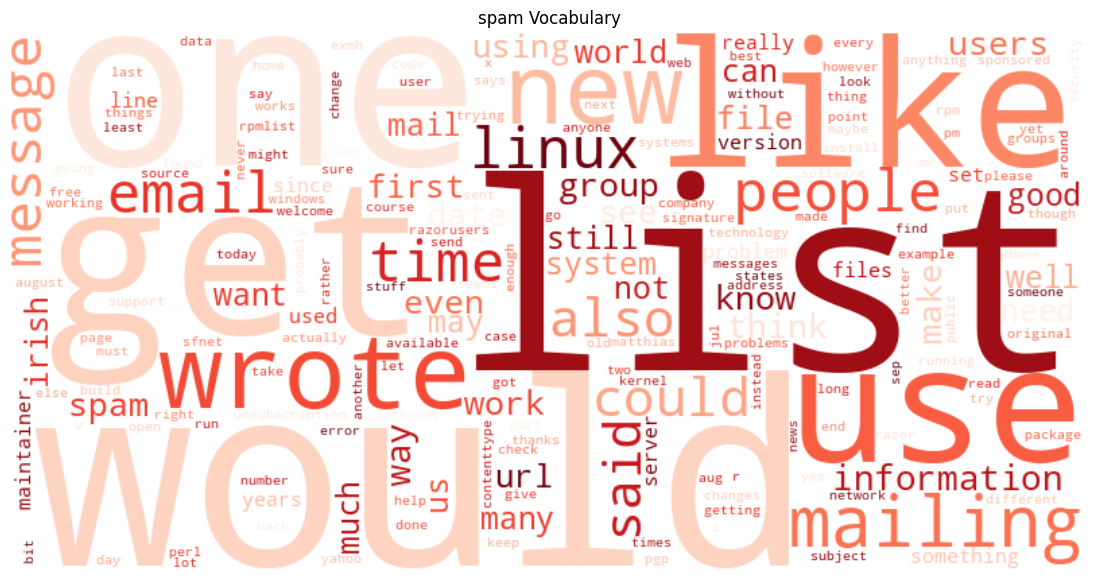

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_dict = dict(zip(df_spam_vocab['token'], df_spam_vocab['frequency']))

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Reds'
).generate_from_frequencies(ham_dict)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('spam Vocabulary')
plt.show()

In [81]:
ham_texts  = df_split.loc[df_split['CATEGORY'] == 0, 'cleaned_text_msg']

ham_vocab, ham_token2id, ham_id2token = create_vocabulary(
    ham_texts,
    min_freq=2,
    max_vocab_size=10000
)

df_ham_vocab = pd.DataFrame(
    list(ham_vocab.items()),
    columns=['token', 'frequency']
)

df_ham_vocab['token_id'] = df_ham_vocab['token'].map(ham_token2id)
df_ham_vocab = df_ham_vocab[['token_id', 'token', 'frequency']]

df_ham_vocab

,token_id,token,frequency
0,0,list,2653
1,1,would,2600
2,2,one,2179
3,3,get,1777
4,4,like,1688
...,...,...,...
9995,9995,hda,5
9996,9996,ig,5
9997,9997,hive,5
9998,9998,scots,5


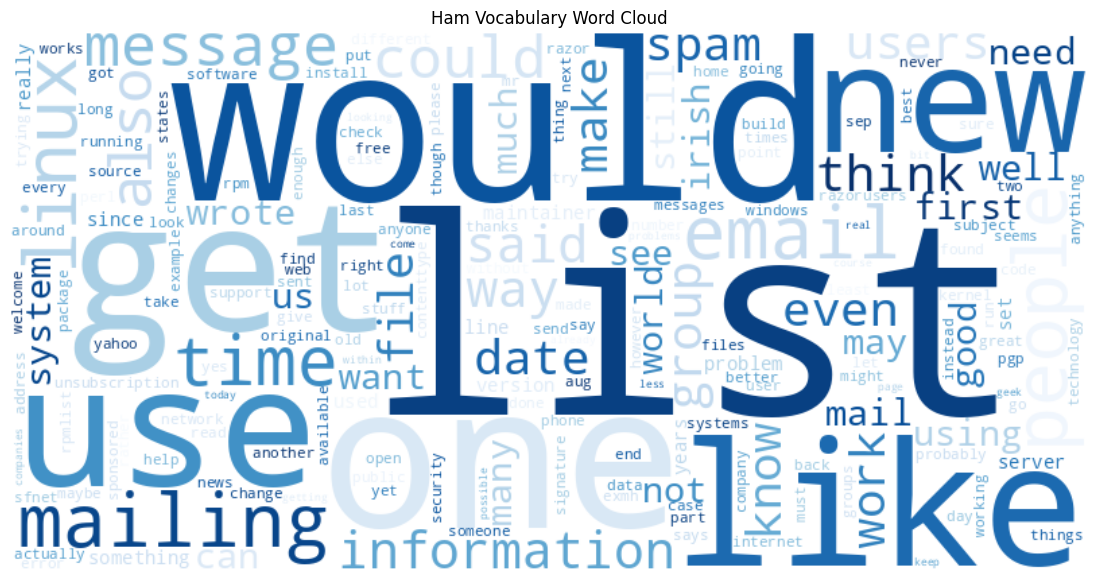

In [82]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a dictionary token -> frequency
ham_dict = dict(zip(df_ham_vocab['token'], df_ham_vocab['frequency']))

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Blues'
).generate_from_frequencies(ham_dict)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ham Vocabulary Word Cloud')
plt.show()

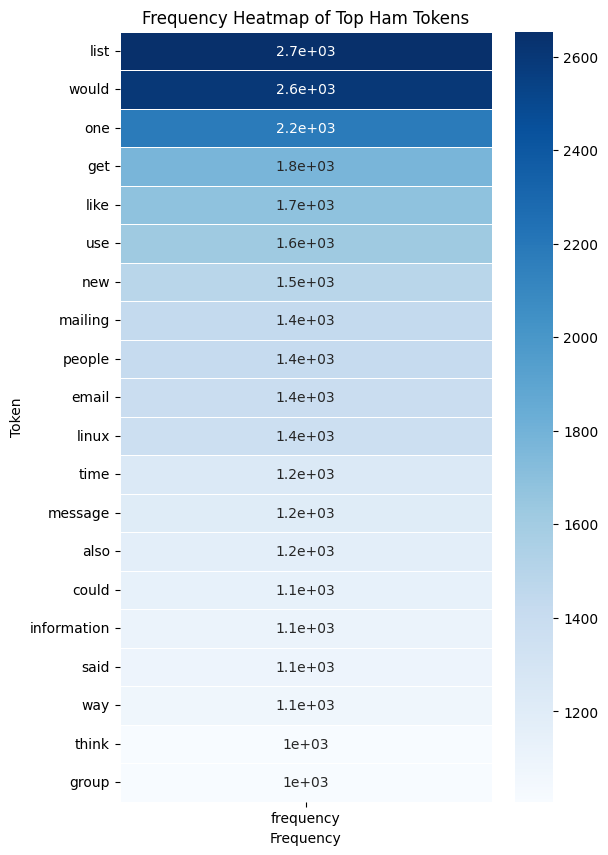

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 20 tokens
top_n = 20
top_ham = df_ham_vocab.sort_values('frequency', ascending=False).head(top_n)

# Create a matrix: tokens as rows, one column with frequency
freq_matrix = top_ham.set_index('token')[['frequency']]

plt.figure(figsize=(6, 10))
sns.heatmap(freq_matrix, annot=True, cmap='Blues', cbar=True, linewidths=.5)
plt.title('Frequency Heatmap of Top Ham Tokens')
plt.xlabel('Frequency')
plt.ylabel('Token')
plt.show()

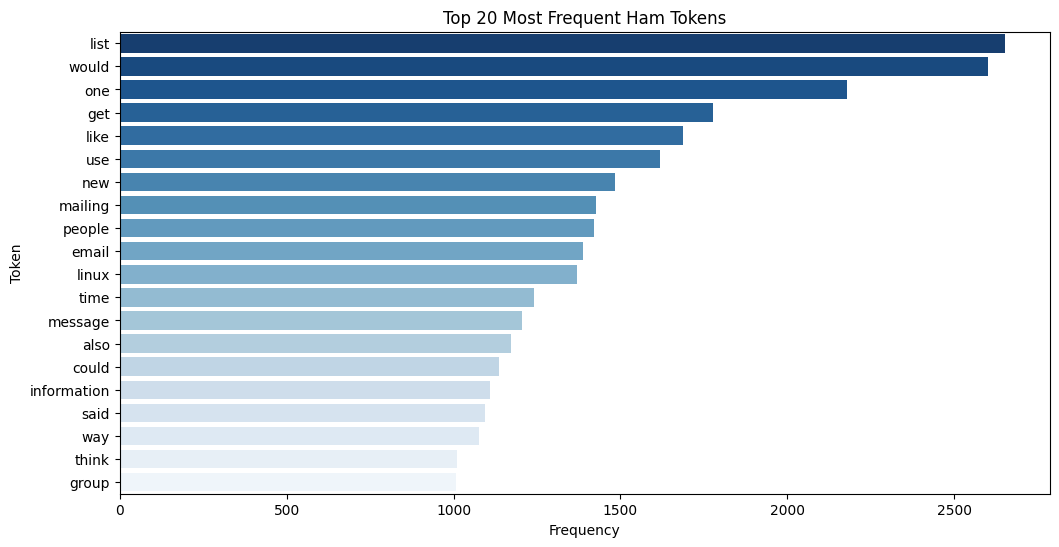

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 20 most frequent ham tokens
top_n = 20
top_ham = df_ham_vocab.sort_values('frequency', ascending=False).head(top_n)

plt.figure(figsize=(12,6))
sns.barplot(x='frequency', y='token', data=top_ham, palette='Blues_r')
plt.title(f'Top {top_n} Most Frequent Ham Tokens')
plt.xlabel('Frequency')
plt.ylabel('Token')
plt.show()

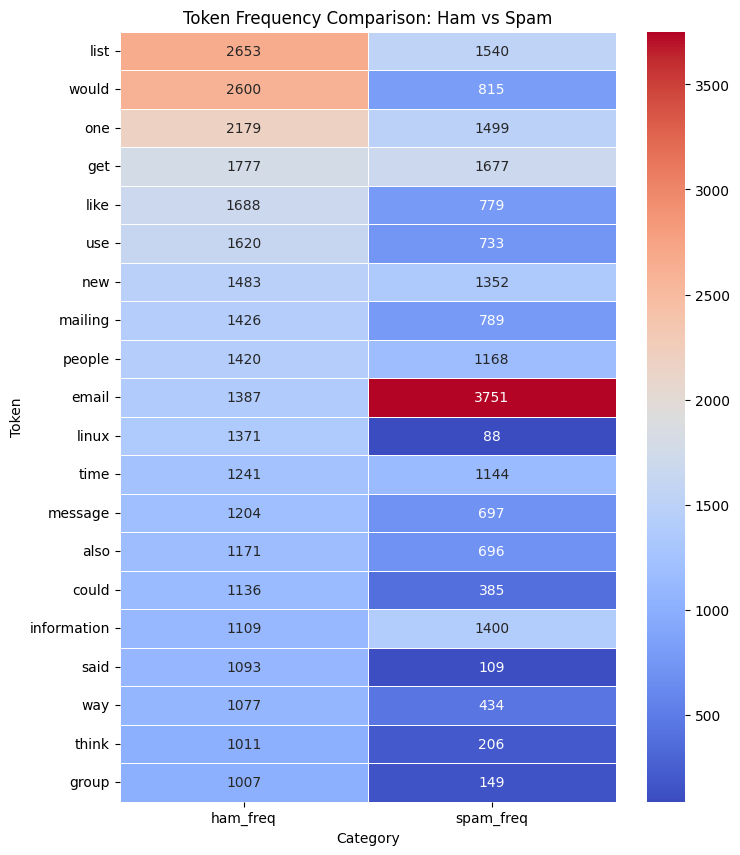

In [85]:
# Top tokens across both vocabularies
top_n = 20
top_tokens = list(df_ham_vocab.sort_values('frequency', ascending=False).head(top_n)['token'])

# Build a comparison matrix
freq_comparison = pd.DataFrame({
    'token': top_tokens,
    'ham_freq': [ham_vocab.get(t, 0) for t in top_tokens],
    'spam_freq': [spam_vocab.get(t, 0) for t in top_tokens]
})

freq_comparison = freq_comparison.set_index('token')

plt.figure(figsize=(8, 10))
sns.heatmap(freq_comparison, annot=True, fmt='d', cmap='coolwarm', linewidths=.5)
plt.title('Token Frequency Comparison: Ham vs Spam')
plt.xlabel('Category')
plt.ylabel('Token')
plt.show()

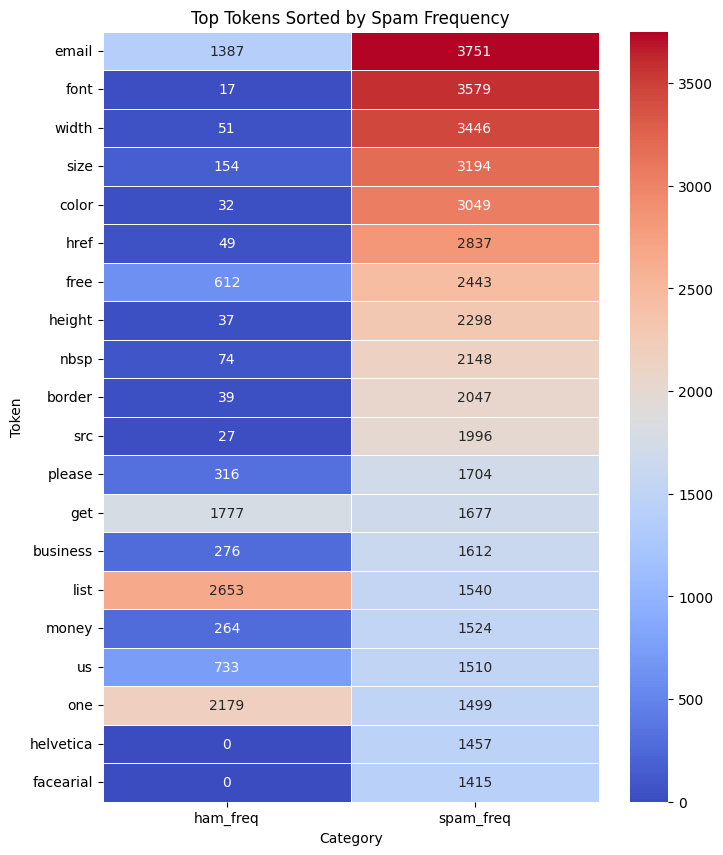

In [86]:
# Top tokens by spam frequency
top_n = 20
top_tokens = list(
    df_spam_vocab.sort_values('frequency', ascending=False).head(top_n)['token']
)

# Build comparison matrix
freq_comparison = pd.DataFrame({
    'token': top_tokens,
    'ham_freq': [ham_vocab.get(t, 0) for t in top_tokens],
    'spam_freq': [spam_vocab.get(t, 0) for t in top_tokens]
})

freq_comparison = freq_comparison.set_index('token')

plt.figure(figsize=(8, 10))
sns.heatmap(freq_comparison, annot=True, fmt='d', cmap='coolwarm', linewidths=.5)
plt.title('Top Tokens Sorted by Spam Frequency')
plt.xlabel('Category')
plt.ylabel('Token')
plt.show()

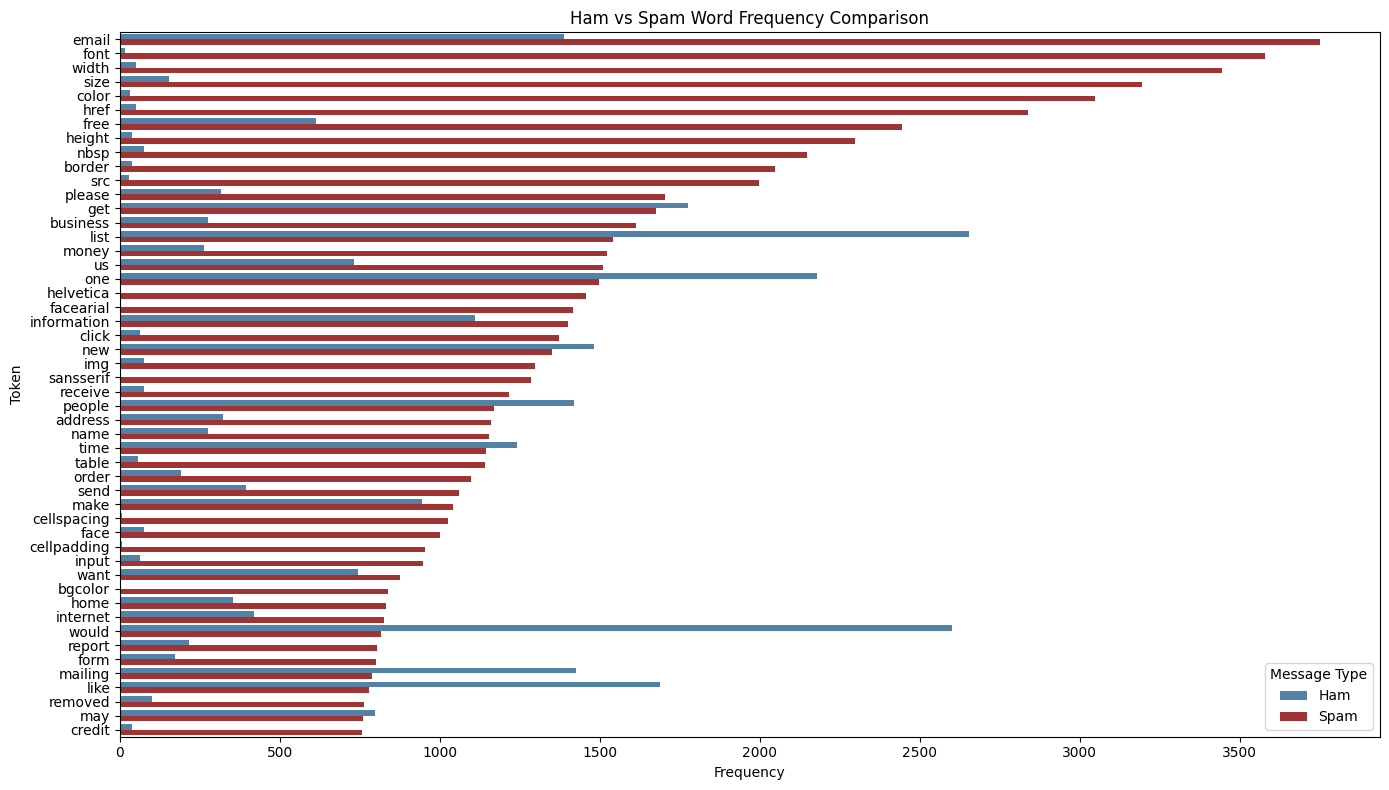

In [89]:
top_n = 50

top_tokens = df_spam_vocab.sort_values(
    'frequency', ascending=False
).head(top_n)['token']

df_compare = pd.DataFrame({
    'token': top_tokens,
    'Ham': [ham_vocab.get(t, 0) for t in top_tokens],
    'Spam': [spam_vocab.get(t, 0) for t in top_tokens]
})

df_compare_long = df_compare.melt(
    id_vars='token',
    var_name='Category',
    value_name='Frequency'
)

plt.figure(figsize=(14, 8))
sns.barplot(
    data=df_compare_long,
    x='Frequency',
    y='token',
    hue='Category',
    palette={'Ham': 'steelblue', 'Spam': 'firebrick'}
)

plt.title('Ham vs Spam Word Frequency Comparison')
plt.xlabel('Frequency')
plt.ylabel('Token')
plt.legend(title='Message Type')
plt.tight_layout()
plt.show()

Accuracy: 0.9828
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       781
        Spam       1.00      0.95      0.97       379

    accuracy                           0.98      1160
   macro avg       0.99      0.97      0.98      1160
weighted avg       0.98      0.98      0.98      1160



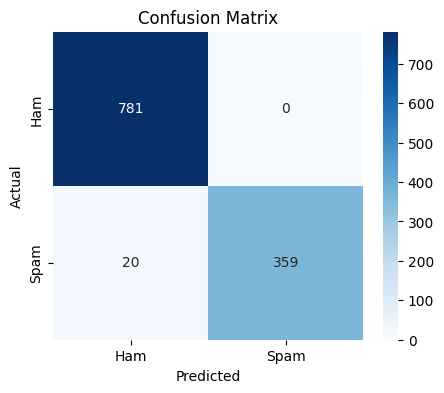

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X = df_split['cleaned_text_msg']
y = df_split['CATEGORY']

# Split into train/test (stratify to preserve label ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

vectorizer = TfidfVectorizer(
    max_features=5000,    # top 5000 tokens
    stop_words='english',
    ngram_range=(1,2)     # unigrams + bigrams
)

# Fit on training data only
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Classification report
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [90]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)

def spam_word_ratio(text):
    tokens = text.split()
    spam_count = sum(1 for t in tokens if t in spam_vocab)
    return spam_count / max(len(tokens),1)

df_split['spam_word_ratio'] = df_split['cleaned_text_msg'].apply(spam_word_ratio)

import scipy.sparse as sp

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)

# Add custom feature
X_train_aug = sp.hstack([X_train_vec, df_split.loc[X_train.index,'spam_word_ratio'].values.reshape(-1,1)])
X_test_aug  = sp.hstack([X_test_vec,  df_split.loc[X_test.index,'spam_word_ratio'].values.reshape(-1,1)])

model.fit(X_train_aug, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
#pip install pyspellchecker
"""
from spellchecker import SpellChecker

def correct_spelling(tokens):
    spell = SpellChecker()
    corrected = [spell.correction(token) for token in tokens]
    return corrected

tqdm.pandas()
df_msg['corrected_tokens'] = df_msg['msg_clean'].progress_apply(correct_spelling)

print(df_msg[['token_word', 'corrected_tokens']].head())"""

In [ ]:
"""
import re
import nltk
from nltk.corpus import stopwords
import contractions

# Download only what you need
nltk.download('stopwords')

# Get stopwords but keep important spam indicators
stop_words = set(stopwords.words('english'))
spam_indicators = {'free', 'win', 'winner', 'cash', 'prize', 'call', 'click', 'urgent', 'now', 'claim', 'bonus'}
stop_words = stop_words - spam_indicators  # Remove spam indicators from stopwords

def preprocess_sms(text):
    if not isinstance(text, str):
        return ""
    
    # 1. Lowercase
    text = text.lower()

    def expand_contractions(text):
        if not isinstance(text, str):
            return ""

        return contractions.fix(text)

    # Expand contractions
    text = expand_contractions(text)
    
    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # 3. Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # 3. REMOVE datetime FIRST ✅
    text = re.sub(
        r'on\s+\w+,\s+\d{4}-\d{2}-\d{2}\s+at\s+\d{1,2}:\d{2}',
        '',
        text,
        flags=re.IGNORECASE
    )

    text = re.sub(r'\b\d{4}-\d{2}-\d{2}\b', '', text)
    text = re.sub(r'\b\d{1,2}:\d{2}\b', '', text)
    
    # 4. Remove special characters (keep letters and spaces)
    #text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    def expand_ord(match):
        try:
            num = int(match.group(1))
            return p.number_to_words(p.ordinal(num))
        except:
            return match.group(0)
    text = re.sub(r'\b(\d+)(st|nd|rd|th)\b', expand_ord, text)
    
    # 5. Simple tokenization (split by spaces)
    words = text.split()
    
    # 6. Remove stopwords (but keep spam indicators)
    words = [word for word in words if word not in stop_words]
    
    # 7. Join back
    text = ' '.join(words)
    
    # 8. Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

df_msg['cleaned_msg'] = df_msg['expanded_msg'].apply(preprocess_sms)
"""

In [ ]:
"""
from spellchecker import SpellChecker

spell = SpellChecker()
spell.word_frequency.load_words([
    'txt', 'wkly', 'fr', 'u', 'ur', 'pls', 'msg', 'sms', 'win', 'cash'
])

_spell_cache = {}

def fast_spell_correct(text):
    tokens = text.split()
    corrected = []

    for word in tokens:
        if (
            len(word) <= 3 or
            word.isdigit() or
            word in spell.word_frequency
        ):
            corrected.append(word)
            continue

        if word in _spell_cache:
            corrected.append(_spell_cache[word])
        else:
            corr = spell.correction(word)
            _spell_cache[word] = corr
            corrected.append(corr)

    return " ".join(corrected)

df_msg['correct_tokens'] = df_msg['sentence_tokens'].progress_apply(
    lambda x: pd.Series(fast_spell_correct(x))
)
"""

In [ ]:
"""
# pip install pyspellchecker spellchecker
from spellchecker import SpellChecker

def correct_spelling(tokens):
    spell = SpellChecker()
    corrected = [spell.correction(token) for token in tokens]
    return corrected

#df_msg['word_tokens'] = tokenize_text(df_msg['cleaned_text'])
df_msg['correct_tokens'] = df_msg['word_tokens'].progress_apply(
    lambda x: pd.Series(correct_spelling(x))
)"""

In [ ]:
"""
from spellchecker import SpellChecker
from tqdm.notebook import tqdm
import pandas as pd

spell = SpellChecker()

def correct_spelling(tokens):
    try:
        # Handle different input types
        if pd.isna(tokens):
            return []
        
        if not isinstance(tokens, list):
            return []
        
        corrected = []
        for token in tokens:
            try:
                if token and isinstance(token, str):
                    correction = spell.correction(token)
                    corrected.append(correction if correction else token)
            except:
                corrected.append(token)
        
        return corrected
    except Exception as e:
        return []

tqdm.pandas()
df_msg['corrected_tokens'] = df_msg['token_word'].progress_apply(correct_spelling)

print(df_msg[['token_word', 'corrected_tokens']].head())"""